# DocArray

In [1]:
from docarray import Document, DocumentArray

In [4]:
from forgebox.imports import *

## Create document object

In [6]:
d = Document(text="Hello", embedding=np.random.rand(50))

In [7]:
d

📄 Document: 5846b01dc5455a7b8afe5151af46c54f
╭───────────┬──────────────────────────────────────────────────────────────────╮
│ Attribute │ Value                                                            │
├───────────┼──────────────────────────────────────────────────────────────────┤
│ text      │ Hello                                                            │
│ embedding │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄               │
╰───────────┴──────────────────────────────────────────────────────────────────╯

## Append document object

In [9]:
d.chunks.append(Document(text="Child",embedding=np.random.rand(50)))

In [10]:
d

📄 Document: 5846b01dc5455a7b8afe5151af46c54f
╭───────────┬──────────────────────────────────────────────────────────────────╮
│ Attribute │ Value                                                            │
├───────────┼──────────────────────────────────────────────────────────────────┤
│ text      │ Hello                                                            │
│ embedding │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄               │
╰───────────┴──────────────────────────────────────────────────────────────────╯
└── 💠 Chunks
    └── 📄 Document: 301537ddff283ee35dfffd3a386f0c6f
        ╭─────────────┬────────────────────────────────────────────────────────────────╮
        │ Attribute   │ Value                                                          │
        ├─────────────┼────────────────────────────────────────────────────────────────┤
        │ parent_id   │ 5846b01dc5455a7b8afe5151af46c54f                               │
        │ granularity │ 1                                                              │
        │ text        │ Child                                                          │
        │ embedding   │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄             │
        ╰─────────────┴────────────────────────────────────────────────────────────────╯

## Image data

In [11]:
IMAGE = Path("./data/left/")

In [13]:
IMAGE.ls()[:2]

['04354.jpg', '02725.jpg']

In [19]:
d = Document(uri=str(IMAGE/"04354.jpg"))

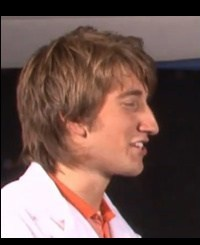

In [20]:
d.display()

## DocumentArray

In [41]:
doc_array = DocumentArray.from_files(list(IMAGE/fname for fname in IMAGE.ls()))

In [42]:
doc_array

╭────────────────── Documents Summary ──────────────────╮
│                                                       │
│   Length                 6016                         │
│   Homogenous Documents   True                         │
│   Common Attributes      ('id', 'mime_type', 'uri')   │
│   Multimodal dataclass   False                        │
│                                                       │
╰───────────────────────────────────────────────────────╯
╭───────────────────── Attributes Summary ─────────────────────╮
│                                                              │
│   Attribute   Data type   #Unique values   Has empty value   │
│  ──────────────────────────────────────────────────────────  │
│   id          ('str',)    6016             False             │
│   mime_type   ('str',)    1                False             │
│   uri         ('str',)    6016             False             │
│                                                              │
╰──────────────────────────────────────────────────────────────╯

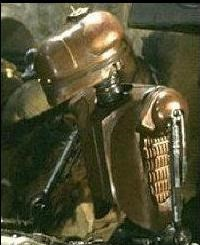

In [43]:
doc_array[2].display()

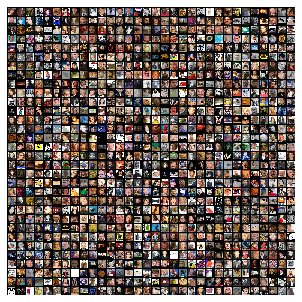

In [44]:
doc_array.plot_image_sprites()

## Creating simple embedding

In [46]:
doc = doc_array[0]

In [47]:
doc

📄 Document: 0b38256762f7ded33969b08d84253892
╭───────────────────────────┬──────────────────────────────────────────────────╮
│ Attribute                 │ Value                                            │
├───────────────────────────┼──────────────────────────────────────────────────┤
│ mime_type                 │ image/jpeg                                       │
│ uri                       │ data/left/04354.jpg                              │
╰───────────────────────────┴──────────────────────────────────────────────────╯

In [65]:
def to_mean_std(doc: Document) -> Document:
    """
    Calculate mean and std as embeddings for Document
    """
    doc = doc.load_uri_to_image_tensor()
    doc.embedding = np.concatenate([
        doc.tensor.mean(0).mean(0),
        doc.tensor.std(0).mean(0),
    ])
    return doc

In [66]:
from tqdm.notebook import tqdm

In [67]:
for doc in tqdm(doc_array):
    to_mean_std(doc)

  0%|          | 0/6016 [00:00<?, ?it/s]

## Visualization

In [ ]:
doc_array.plot_embeddings(image_sprites=True)

## Match

In [78]:
dsearch = Document(text="test-input", embedding=np.array([200,100,100,30,30,30]))

In [79]:
dsearch.embedding

array([200, 100, 100,  30,  30,  30])

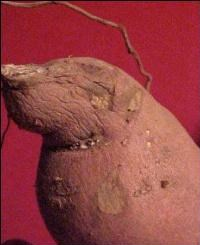

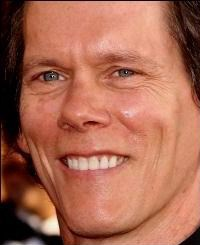

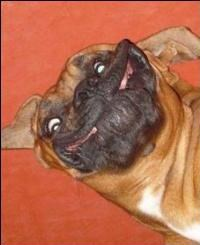

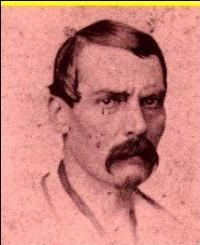

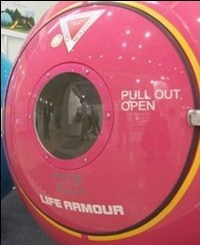

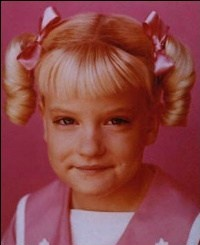

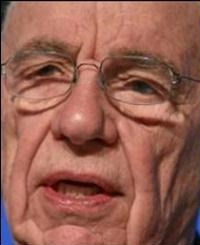

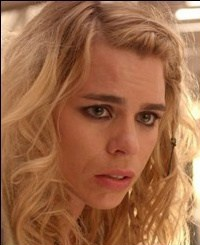

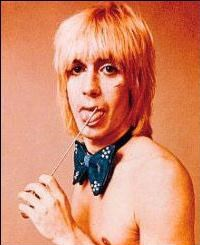

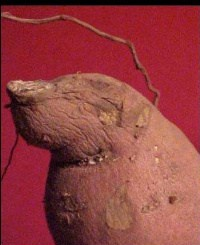

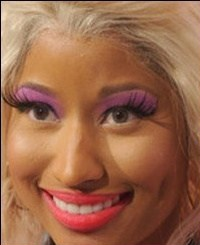

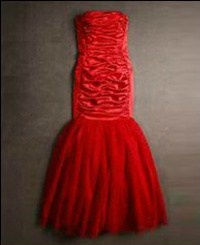

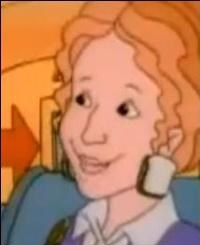

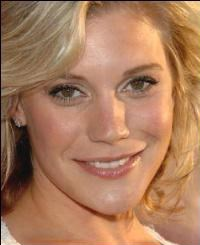

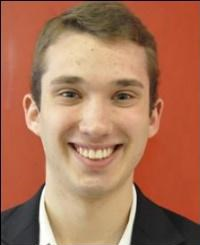

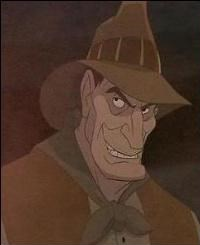

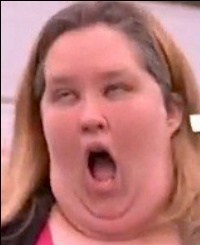

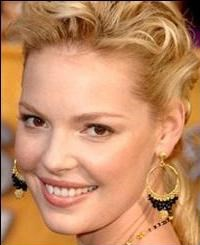

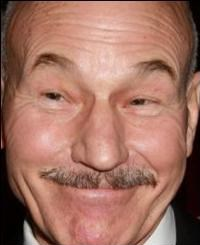

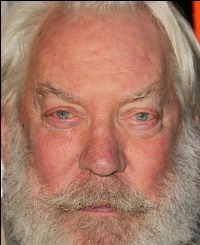

In [83]:
for d in doc_array.find(dsearch)[0]:
    d.display()